In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  

In [2]:
iris = pd.read_excel("data/Iris.xls")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['species_num'] = [iris_class[i] for i in iris.iris]
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


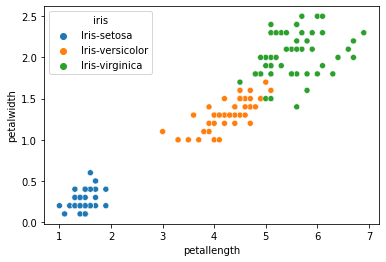

In [4]:
sns.scatterplot(data=iris, x='petallength', y='petalwidth', hue='iris')
plt.show()

In [5]:
X = iris.drop(['iris', 'species_num'], axis=1)
y = iris.species_num

In [6]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, 
                                                    stratify=y)

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [8]:
clf = LogisticRegression(multi_class='multinomial')

In [9]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [10]:
y_pred = clf.predict(X_test)

In [11]:
# Kiểm tra độ chính xác
print("The prediction accuracy is: ", clf.score(X_test,y_test))

The prediction accuracy is:  1.0


In [12]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values, 
                   'Prediction': pd.DataFrame(y_pred)[0].values})  
df.head()

,Actual,Prediction
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
